# **From Tweets to Hope: A Data-Driven Approach to Supporting the Needy in America**

Under Prof. Edmund Yu


# **Code:**

"vaderSentiment" is a library used for sentiment analysis of texts, which means it can analyze a piece of text and determine whether it has a positive, negative, or neutral sentiment. It uses a rule-based approach to sentiment analysis, which means it relies on a set of pre-defined rules and lexicons to determine the sentiment of a given text.


In [1]:
# Installs the Python package "vaderSentiment" via pip, a package installer for Python.
!pip install vaderSentiment

     ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
     -------------------------------------- 126.0/126.0 kB 2.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


"Flair" is a natural language processing (NLP) library for Python that provides a wide range of NLP capabilities, including part-of-speech tagging, named entity recognition, text classification, and sentiment analysis. It is known for its state-of-the-art language models and pre-trained embeddings.

In [ ]:
# Installs the Python package "flair" via pip, a package installer for Python.
!pip install flair

"Chart Studio" is a web-based data visualization and sharing platform that allows users to create and share interactive charts and graphs online. The "chart_studio" Python package is a client library that provides an interface for interacting with the Chart Studio API and creating and uploading visualizations from Python code.

In [ ]:
# Installs the Python package "chart_studio" via pip, a package installer for Python.
!pip install chart_studio

"Plotly" is an open-source data visualization library for Python that allows users to create a wide range of interactive charts and graphs. It supports a variety of chart types, including scatter plots, bar charts, line charts, and more, and provides a range of customization options to help users create visually appealing and informative visualizations.

In [ ]:
# Installs the Python package "plotly" via pip, a package installer for Python.
!pip install plotly

"Geopandas" is an open-source library for working with geospatial data in Python. It provides an interface for working with vector-based spatial data, such as points, lines, and polygons, and enables users to perform a wide range of geospatial operations, including spatial joins, spatial queries, and spatial data analysis.

In [ ]:
#  Installs the Python package "geopandas" via pip, a package installer for Python.
!pip install geopandas

In [ ]:
import tweepy
import re
import pandas as pd
import spacy
import nltk
import flair
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.offline as po
import plotly.graph_objs as pg

from textblob import TextBlob
from flair.models import TextClassifier
from flair.data import Sentence
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk import FreqDist
from collections import defaultdict
from google.colab import files

nlp = spacy.load("en_core_web_sm")

# A dataset used for tokenizing text
nltk.download('punkt')

# A dataset used for part-of-speech tagging
nltk.download('averaged_perceptron_tagger')

# Downloads the 'stopwords' corpus, which is a list of commonly used words (such as "the", "and", etc.) that are usually removed from text during pre-processing
nltk.download('stopwords')
nltk_stops = nltk.corpus.stopwords.words('english')

# Downloads the 'wordnet' and 'omw-1.4' corpus, which is used for lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
wnl = nltk.WordNetLemmatizer()

In [ ]:
# CONSUMER_KEY = 'TZ7i40WeANa0gWBpytGsjc7se'
# CONSUMER_SECRET = 'NRWRlNs01IWFl8xfP6Xsct3gdb8lkOI2kBCNuVMkby47OMeD48'
# OAUTH_TOKEN = '2474122806-dWEoJhdMtwoPwFIvnZGQQk2qw5XQScTIjQ6Y92T'
# OAUTH_TOKEN_SECRET = '2sLvxi1Zn6MhQr1VJVU8x6Dvjm2EMFIALHXM5vqnZxxCf'

# CONSUMER_KEY = "05STxgO9l7x64L0fc0QTTS8m8"
# CONSUMER_SECRET = "4TXRNXuEk10YdXwgObV5EsTvvs2mmTL7yxHE0nbogWvvHotCBc"
# OAUTH_TOKEN = "1503570389955485699-5cqps2aGehm8nEkYyWFkSzv32eYZif"
# OAUTH_TOKEN_SECRET = "GlCEZSkVXARbwRDhUnNcvbX9orAGxKPXkRflEu4V43G0c"

CONSUMER_KEY = '4OezTMRvGza3rubQlnl6IyhTF'
CONSUMER_SECRET = 'hHphKaQsTuQ7WChdxdeI6ufVUp2Eioa60Sp9gg8y1ZR2tVeICi'
OAUTH_TOKEN = '1356123933301493761-hnDb6Gt7M4xoSuyf2W0L6OKdx82ght'
OAUTH_TOKEN_SECRET = 'ZiGsSdTrcr3t77Wqfq64uhY3eRZ17nOSSRP84hvTaQTjC'


# Authenticate Twitter API credentials
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth)

# **1) Extracting Needy Tweets**


The code below collects tweets of users who are in need of help, using the Twitter API that contain certain keywords and location information using the Tweepy library.

A dictionary called needyTweets is defined to store the relevant tweet details. The geocode variable specifies a geographical location in latitude and longitude (in this case, the center of the United States) and a search radius of 2500km. The code then uses the Tweepy Cursor object to search for tweets that match the specified query, language, and location parameters.

The query filters out retweets and focuses on tweets that contain keywords such as "UrgentHelp," "helpneeded," "Needmoneyforsurgery," "DonateForACause," "FeedTheHungry," "Homelessoutreach," "EarthquakeRelief," "CycloneRelief," "GoFundMe," "gofundmedonations," and "4charity."

The code searches for a maximum of 10,000 tweets, each time retrieving 100 tweets. For each tweet that matches the search criteria, the code extracts relevant tweet details such as the user's screen name, tweet ID, location, and full text. Finally, it stores these details in the needyTweets dictionary using the tweet ID as the key.

In [ ]:
# Collect tweets
needyTweets = {}
geocode = '"39.8,-95.583068847656,2500km"'
# Loop through tweets containing specific keywords and within a specific geographic area
for tweet in tweepy.Cursor(api.search_tweets, q = "UrgentHelp OR helpneeded OR Needmoneyforsurgery\ 
                                                   OR DonateForACause OR FeedTheHungry OR Homelessoutreach\ 
                                                   OR FeedTheHungry OR Homelessoutreach\ 
                                                   OR EarthquakeRelief OR CycloneRelief OR GoFundMe\
                                                   OR gofundmedonations OR 4charity -filter:retweets",
                           geocode = geocode,
                           lang = 'en',
                           tweet_mode = 'extended',
                           count = 100).items(10000):
  # Removing retweets
  if not tweet.retweeted:
    # Create dictionary of tweet details and store in 'needyTweets' dictionary using tweet id as key
    tweetDetails = {
        'name': tweet.user.screen_name,
        'tweetID': tweet.id,
        'location': tweet.user.location,
        'full_text': tweet.full_text
    }
    needyTweets[tweet.id] = tweetDetails

In [ ]:
# Number of Needy Tweets Extracted
len(needyTweets)

In [ ]:
# printing needyTweets data
needyTweets

{1654589284098404352: {'name': 'BioRecTech',
  'tweetID': 1654589284098404352,
  'location': 'Earth',
  'full_text': "@RonFilipkowski So if it's cool with billionaires to buy off Supreme Court judges, why can't we start a gofundme? 😂"},
 1654589283280330753: {'name': 'billierain',
  'tweetID': 1654589283280330753,
  'location': 'seattle',
  'full_text': 'Wrextoration’s Auto Body Shop devastating fire \n https://t.co/CQLDqQmBWM'},
 1654588935241080834: {'name': 'JordanKissaneTV',
  'tweetID': 1654588935241080834,
  'location': 'New York, NY',
  'full_text': 'Hear Brooklyn and Mr. Kitty’s full story TONIGHT ‘On A Positive Note!’ \n\nCLICK HERE TO HELP 💛 https://t.co/ef0NIM7FNc https://t.co/0kTKQg1wSJ'},
 1654588123819675648: {'name': 'MrFoley2832',
  'tweetID': 1654588123819675648,
  'location': 'Keizer, OR',
  'full_text': "Holly, Rylee, Michael and Tiffany's funeral https://t.co/dnbet0acL6 \n\nHolly was my niece. Her kids were my great nieces and nephew. @maddow @andersoncooper  @MSNBC

# **Data Preprocessing**

The below code defines a function preprocessText which takes in a text argument and performs several pre-processing steps on it. The steps are:

1. Tokenizing the text using nltk.word_tokenize.
2. Converting all tokens to lowercase.
3. Removing tokens that are not alpha-numeric.
4. Removing stop words using nltk_stops (which is a list of commonly used  words that are usually removed during pre-processing).
5. Lemmatizing the remaining words using wnl.lemmatize.
6. Returning the pre-processed words.

Each of the steps is described with a comment above it.

In [ ]:
# Actual Data Pre-processing is done here.
def preprocessText(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    # Consider strings containing only alphabets and numbers
    words = [w for w in tokens if w.isalnum()]
    # Remove stop words
    words = [word for word in words if word not in nltk_stops]
    # Lemmatize words
    words = [wnl.lemmatize(word) for word in words]
    # Return processed text
    return words

The below code is responsible for pre-processing and cleaning up the tweets collected in needyTweets dictionary in the previous code block.

The pre-processing steps include:

1. Removing URLs from the tweet text using regex pattern matching.
2. Removing user mentions (text that starts with '@') from the tweet text using regex pattern matching.
3. Removing hashtags (text that starts with '#') from the tweet text using regex pattern matching.
4. Removing leading and trailing white spaces from the tweet text using the strip() method.
5. Keeping only non-empty tweets.
6. The cleaned tweets are stored in a new dictionary called cleaned_needy_tweets with tweet ID as the key and cleaned tweet text as the value.

The preprocessText() function is called on the cleaned tweet text to tokenize, convert to lowercase, remove stop words and lemmatize the words. The resulting list of processed words is stored in the wordListNeedy list for later use.

In [ ]:
# Pre-process and Clean-up tweets
# A dictionary to store cleaned tweets
cleaned_needy_tweets = {}
wordListNeedy = []
for tweetId, tweetDetails in needyTweets.items():
    # remove URLs
    cleaned_tweet = re.sub(r'http\S+', '', tweetDetails['full_text'])
    # remove user mentions
    cleaned_tweet = re.sub(r'@\S+', '', cleaned_tweet)
    # remove hashtags
    cleaned_tweet = re.sub(r'#\S+', '', cleaned_tweet)
    # remove leading/trailing white space
    cleaned_tweet = cleaned_tweet.strip() 
    # only keep non-empty tweets 
    if cleaned_tweet:
        cleaned_needy_tweets[tweetId] = cleaned_tweet
        wordListNeedy.extend(preprocessText(cleaned_tweet))

In [ ]:
# printing cleaned_needy_tweets data
cleaned_needy_tweets

{1654589284098404352: "So if it's cool with billionaires to buy off Supreme Court judges, why can't we start a gofundme? 😂",
 1654589283280330753: 'Wrextoration’s Auto Body Shop devastating fire',
 1654588935241080834: 'Hear Brooklyn and Mr. Kitty’s full story TONIGHT ‘On A Positive Note!’ \n\nCLICK HERE TO HELP 💛',
 1654588123819675648: "Holly, Rylee, Michael and Tiffany's funeral  \n\nHolly was my niece. Her kids were my great nieces and nephew.          6 slain, and the 7th was the murderer ..why no coverage?",
 1654587775545401344: "I need help with opening folders. When I open for example Downloads this message pops up. Does anyone know of to fix it? I'm on Win 10 also.",
 1654587751558160384: "That's great. Fake cough to GoFundMe mention and then just grin",
 1654587665876918274: "Let's start a GoFundMe for them to go to Spain lol",
 1654587627213930496: 'Will you help me with any amount. I’m sick in many ways on top of Parkinson’s &amp; 7 doctors. I lost my home &amp; living in 

# **Frequency Distribution**

The below code is used to identify and filter tweets containing words that are frequently used in the corpus of tweets related to needy people.

1. nltk.FreqDist(wordListNeedy) creates a frequency distribution of all the words in the wordListNeedy list.
2. frequentWordListNeedy.most_common(30) returns the 30 most commonly occurring words from the wordListNeedy list as a list of tuples with each tuple containing the word and its count.
3. needy_keywords is a list that contains only the words from the importantWordListNeedy list.
4. filtered_needy_tweets_freq is a dictionary that stores only those tweets from cleaned_needy_tweets dictionary that contain any of the words in needy_keywords list.

Overall, this code helps to filter out the most important tweets that contain words that are commonly used in the context of needy people.

In [ ]:
# Calculate the frequency distribution of words in the cleaned tweets
frequentWordListNeedy = nltk.FreqDist(wordListNeedy)
# Get the 30 most common words from the frequency distribution
importantWordListNeedy = frequentWordListNeedy.most_common(30)

In [ ]:
# Create a list of needy keywords from the most common words
needy_keywords = [word for word, count in importantWordListNeedy]

# Filter the cleaned tweets to get only those that contain the needy keywords
filtered_needy_tweets_freq = {}
for tweetId, tweet in cleaned_needy_tweets.items():
    if any(keyword in tweet.lower() for keyword in needy_keywords):
        filtered_needy_tweets_freq[tweetId] = tweet

# **Named Entity Recognition**

The below code is used to perform Named Entity Recognition (NER) on a set of tweets that have been filtered based on certain keywords related to needs, as well as frequency analysis.

The `relevant_entities` list contains the types of named entities that we want to extract from the tweets. In this case, we are interested in organizations, people and money.

A new empty dictionary `filtered_needy_tweets_ner` is created to hold the filtered tweets after performing NER.

A loop is then executed over each tweet in the `filtered_needy_tweets_freq` dictionary, and the SpaCy NLP library is used to perform NER on each tweet. The named entities of interest are extracted and checked against the `relevant_entities` list. If there are no entities of interest in the tweet, it is skipped. If there are, the tweet is added to the `filtered_needy_tweets_ner` dictionary with the tweetId as key and the tweet text as value.

In [ ]:
# Define relevant named entity types
relevant_entities = ["ORG", "PERSON", "MONEY"]

# Create an empty dictionary to store filtered tweets with relevant named entities
filtered_needy_tweets_ner = {}

# Iterate over each tweet and perform NER
for tweetId, tweet in filtered_needy_tweets_freq.items():
    # Create a Doc object of the tweet using spaCy
    doc = nlp(tweet)
    # Extract named entities of relevant types
    entities = [ent for ent in doc.ents if ent.label_ in relevant_entities]
    # If there are no relevant entities in the tweet, skip to the next tweet
    if not entities:
        continue
    # Otherwise, store the tweet in the filtered_needy_tweets_ner dictionary
    filtered_needy_tweets_ner[tweetId] = tweet

# **POS Tagging**

The above code aims to filter the tweets that contain relevant parts of speech (POS) tags. The relevant POS tags are defined in the `relevant_tags` list.

The code defines a `pos_tagging` function that uses the NLTK library's `pos_tag` function to perform POS tagging on the input text. The function returns a list of tuples, with each tuple containing a word and its corresponding POS tag.

The code then creates an empty dictionary `filtered_needy_tweets_pos` to store the filtered tweets.

The code then iterates through each tweet in the `filtered_needy_tweets_ner` dictionary, and applies the `pos_tagging` function to it. It then checks if any of the POS tags in the tweet match the relevant POS tags defined in the `relevant_tags` list using a list comprehension and the `any `function. If the tweet contains at least one relevant POS tag, it is added to the `filtered_needy_tweets_pos` dictionary.

Overall, this code is filtering tweets that contain specific POS tags, in order to identify tweets that are likely to be relevant to the task at hand.

In [ ]:
# Nouns (NN):       "donation", "charity", "help", "support" 
# Verbs (VB):       "donate," "give," "support," "help" are frequently used in these tweets.
# Adjectives (JJ):  "generous," "kind," "grateful,"  "thankful" are used to express 
#                     gratitude towards donors and supporters.
# Pronouns (PRP):   "we", "us" and "you" are used to refer to the individuals
#                     and organizations involved in the charitable efforts.
# Adverbs (RB):     "kindly," "graciously," and "generously" are used to describe
#                     the manner in which donations and support are given.

relevant_tags = ["NN", "VB", "JJ", "PRP", "RB"]

# Define POS tagging function
def pos_tagging(text):
    tokens = nltk.word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    return tags

# Create empty dictionary to store filtered tweets
filtered_needy_tweets_pos = {}

# Iterate over the tweets that contain relevant entities
for tweetId, tweet in filtered_needy_tweets_ner.items():
  
    # Perform POS tagging on the tweet text
    tags = pos_tagging(tweet)

    # Check if the tweet contains any relevant POS tags
    if any(tag[1] in relevant_tags for tag in tags):
        filtered_needy_tweets_pos[tweetId] = tweet

# **Sentiment Analysis**

***TextBlob***

The below code is calculating the sentiment polarity score for each tweet in the filtered_needy_tweets_pos dictionary using TextBlob library. It initializes an empty dictionary textblob_scores_needy to store the tweet Id as the key and its TextBlob sentiment polarity score as the value.

For each tweet in filtered_needy_tweets_pos, it uses the TextBlob function to calculate the polarity score.

Finally, it adds the polarity score to the textblob_scores_needy dictionary with the tweetId as the key.

In [ ]:
textblob_scores_needy = {}
for tweetId, tweet in filtered_needy_tweets_pos.items():
    # Calculate TextBlob sentiment polarity score for each tweet
    textblob_score = TextBlob(tweet).sentiment.polarity
    # Add the score to the textblob_scores_needy dictionary with tweetId as key
    textblob_scores_needy[tweetId] = textblob_score

***Vader***

The below code computes the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment scores for each tweet in the filtered_needy_tweets_pos dictionary using the SentimentIntensityAnalyzer() from the nltk.sentiment module.

In [ ]:
vader_scores_needy = {}
for tweetId, tweet in filtered_needy_tweets_pos.items():
    # Initialize the SentimentIntensityAnalyzer
    vader_analyzer = SentimentIntensityAnalyzer()
    # Calculate the Vader sentiment compound score for each tweet
    vader_score = vader_analyzer.polarity_scores(tweet)['compound']
    # Add the score to the vader_scores_needy dictionary with tweetId as key
    vader_scores_needy[tweetId] = vader_score

***Flair***

The first line loads a pre-trained Flair text classifier for sentiment analysis in English. The classifier is capable of classifying text into positive, negative, or neutral sentiment.

The next section of code creates an empty dictionary flair_scores_needy to store the sentiment scores for each tweet.

The for loop iterates through each tweet in the filtered_needy_tweets_pos dictionary. For each tweet, a Flair Sentence object is created containing the tweet text. Then, the pre-trained flair_classifier is used to predict the sentiment of the tweet. The predicted sentiment is then added to the flair_scores_needy dictionary with the tweetId as the key.

In [ ]:
# Load pre-trained sentiment classifier from Flair
flair_classifier = TextClassifier.load('en-sentiment')

flair_scores_needy = {}
for tweetId, tweet in filtered_needy_tweets_pos.items():
    # Create a Flair Sentence object from the tweet
    flair_sentence = Sentence(tweet)
    # Use the Flair classifier to predict the sentiment of the sentence
    flair_classifier.predict(flair_sentence)
    # flair_scores_needy[tweetId] = flair_sentence.labels[0].score
    # Store the sentiment label with highest confidence score as the sentiment score for the tweet
    flair_scores_needy[tweetId] = flair_sentence.labels[0].value

2023-05-05 20:55:01,522 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpuucyj3i1


100%|██████████| 253M/253M [00:07<00:00, 34.0MB/s]

2023-05-05 20:55:09,426 copying /tmp/tmpuucyj3i1 to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2023-05-05 20:55:10,635 removing temp file /tmp/tmpuucyj3i1


In [ ]:
# Initialize dictionaries to store positive and negative tweets based on TextBlob, VADER, and Flair scores

positive_tweets_needy_textblob = {}
negative_tweets_needy_textblob = {}

positive_tweets_needy_vader = {}
negative_tweets_needy_vader = {}

positive_tweets_needy_flair = {}
negative_tweets_needy_flair = {}

# Iterate through each tweet and score them based on their TextBlob, VADER, and Flair sentiment scores
for tweetId, tweet in filtered_needy_tweets_pos.items():
    # Add tweet to the positive dictionary if its TextBlob score is above 0.25, else add it to negative dictionary
    if textblob_scores_needy[tweetId] > 0.25:
        positive_tweets_needy_textblob[tweetId] = tweet
    else:
        negative_tweets_needy_textblob[tweetId] = tweet   
     
    # Add tweet to the positive dictionary if its VADER score is above 0.05, else add it to negative dictionary
    if vader_scores_needy[tweetId] > 0.05:
        positive_tweets_needy_vader[tweetId] = tweet
    else:
        negative_tweets_needy_vader[tweetId] = tweet

    # Add tweet to the positive dictionary if its Flair score is 'POSITIVE', else add it to negative dictionary
    if flair_scores_needy[tweetId] == 'POSITIVE':
        positive_tweets_needy_flair[tweetId] = tweet
    else:
        negative_tweets_needy_flair[tweetId] = tweet  

# **2) Extracting Donor Tweets**


The code below collects tweets of users who are volunteers/donors, using the Twitter API,

A dictionary called donorTweets is defined to store the relevant tweet details. The geocode variable specifies a geographical location in latitude and longitude (in this case, the center of the United States) and a search radius of 2500km. The code then uses the Tweepy Cursor object to search for tweets that match the specified query, language, and location parameters.

The query filters out retweets and focuses on tweets that contain keywords such as "charitysector", "mainedayofgiving","CharitableGiving", "CommunityService",  "MakingADifference", "givingbacktothecommunity", "CharityWork", "Volunteering", "HumanityFirst", "DigitalFundraising", "GivingBack", "NGO", "donationsappreciated", "blooddonor",  "plasmadonor", "organdonor"


The code searches for a maximum of 10,000 tweets, each time retrieving 100 tweets. For each tweet that matches the search criteria, the code extracts relevant tweet details such as the user's screen name, tweet ID, location, and full text. Finally, it stores these details in the needyTweets dictionary using the tweet ID as the key.

In [ ]:
# Collect tweets
donorTweets = {}
# Represents Latitute and Longitue along with 2500 km Radius.
geocode = '"39.8,-95.583068847656,2500km"'
# Iterate through the Twitter API search results
for tweet in tweepy.Cursor(api.search_tweets, q = "charitysector OR mainedayofgiving OR CharitableGiving\
                                                   OR CommunityService OR MakingADifference OR givingbacktothecommunity\
                                                   OR CharityWork OR Volunteering OR HumanityFirst OR DigitalFundraising\
                                                   OR GivingBack OR NGO OR donationsappreciated OR blooddonor\
                                                   OR plasmadonor OR organdonor -filter:retweets",
                           geocode = geocode,
                           lang = 'en',
                           tweet_mode = 'extended',
                           count=100).items(10000):
                           
  # Removing retweets
  if not tweet.retweeted:
    # Extract tweet details and add to donorTweets dictionary
    tweetDetails = {
        'name': tweet.user.screen_name,
        'tweetID': tweet.id,
        'location': tweet.user.location,
        'full_text': tweet.full_text
    }
    # Add the tweet to the donorTweets dictionary with tweet ID as key
    donorTweets[tweet.id] = tweetDetails

In [ ]:
# Number of Donor Tweets Extracted
len(donorTweets)

8321

In [ ]:
# Actual Data Pre-processing is done here.
def preprocessText(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    # Consider strings containing alphabets and numbers
    words = [w for w in tokens if w.isalnum()]
    # Remove stop words
    words = [word for word in words if word not in nltk_stops]
    # Lemmatize words
    words = [wnl.lemmatize(word) for word in words]
    # Return processed text
    return words

In [ ]:
# Pre-process and Clean-up tweets
cleaned_donor_tweets = {}
wordListDonor = []
for tweetId, tweetDetails in donorTweets.items():
    # remove URLs
    cleaned_tweet = re.sub(r'http\S+', '', tweetDetails['full_text'])
    # remove user mentions
    cleaned_tweet = re.sub(r'@\S+', '', cleaned_tweet)
    # remove hashtags  
    cleaned_tweet = re.sub(r'#\S+', '', cleaned_tweet) 
    # remove leading/trailing white space 
    cleaned_tweet = cleaned_tweet.strip() 
    # only keep non-empty tweets 
    if cleaned_tweet: 
        cleaned_donor_tweets[tweetId] = cleaned_tweet
        wordListDonor.extend(preprocessText(cleaned_tweet))

# **Frequency Distribution**

In [ ]:
# Calculate the frequency distribution of words in the cleaned tweets
frequentWordListDonor = nltk.FreqDist(wordListDonor) 
# Get the 30 most common words from the frequency distribution
importantWordListDonor = frequentWordListDonor.most_common(30)

In [ ]:
# Identify donor tweets
donor_keywords = [word for word, count in importantWordListDonor]

# Filter the cleaned tweets to get only those that contain the donor keywords
filtered_donor_tweets_freq = {}
for tweetId, tweet in cleaned_donor_tweets.items():
    if any(keyword in tweet.lower() for keyword in donor_keywords):
        filtered_donor_tweets_freq[tweetId] = tweet

# **Named Entity Recognition**

In [ ]:
# Define relevant named entity types
relevant_entities = ["ORG", "PERSON", "MONEY"]

# Create an empty dictionary to store filtered tweets with relevant named entities
filtered_donor_tweets_ner = {}

# Iterate over each tweet and perform NER
for tweetId, tweet in filtered_donor_tweets_freq.items():
    # Create a Doc object of the tweet using spaCy
    doc = nlp(tweet)
    # Extract named entities of relevant types
    entities = [ent for ent in doc.ents if ent.label_ in relevant_entities]
    # If there are no relevant entities in the tweet, skip to the next tweet
    if not entities:
        continue
    # Otherwise, store the tweet in the filtered_donor_tweets_ner dictionary
    filtered_donor_tweets_ner[tweetId] = tweet

# **POS Tagging**

In [ ]:
# Nouns (NN):       "donation", "charity", "help", "support" 
# Verbs (VB):       "donate," "give," "support," "help" are frequently used in these tweets.
# Adjectives (JJ):  "generous," "kind," "grateful,"  "thankful" are used to express 
#                     gratitude towards donors and supporters.
# Pronouns (PRP):   "we", "us" and "you" are used to refer to the individuals
#                     and organizations involved in the charitable efforts.
# Adverbs (RB):     "kindly," "graciously," and "generously" are used to describe
#                     the manner in which donations and support are given.

relevant_tags = ["NN", "VB", "JJ", "PRP", "RB"]

# POS tagging function
def pos_tagging(text):
    tokens = nltk.word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    return tags

# Create empty dictionary to store filtered tweets
filtered_donor_tweets_pos = {}

# Iterate over the tweets that contain relevant entities
for tweetId, tweet in filtered_donor_tweets_ner.items():

    # Perform POS tagging on the tweet text
    tags = pos_tagging(tweet)

    # Check if the tweet contains any relevant POS tags
    if any(tag[1] in relevant_tags for tag in tags):
        filtered_donor_tweets_pos[tweetId] = tweet

# **Sentiment Analysis**

***TextBlob***

In [ ]:
textblob_scores_donor = {}
for tweetId, tweet in filtered_donor_tweets_pos.items():
    # Calculate TextBlob sentiment polarity score for each tweet
    textblob_score = TextBlob(tweet).sentiment.polarity
    # Add the score to the textblob_scores_donor dictionary with tweetId as key
    textblob_scores_donor[tweetId] = textblob_score

***Vader***

In [ ]:
vader_scores_donor = {}
for tweetId, tweet in filtered_donor_tweets_pos.items():
    # Initialize the SentimentIntensityAnalyzer
    vader_analyzer = SentimentIntensityAnalyzer()
    # Calculate the Vader sentiment compound score for each tweet
    vader_score = vader_analyzer.polarity_scores(tweet)['compound']
    # Add the score to the vader_scores_donor dictionary with tweetId as key
    vader_scores_donor[tweetId] = vader_score

***Flair***

In [ ]:
# Load pre-trained sentiment classifier from Flair
flair_classifier = TextClassifier.load('en-sentiment')

flair_scores_donor = {}
for tweetId, tweet in filtered_donor_tweets_pos.items():
    # Create a Flair Sentence object from the tweet
    flair_sentence = Sentence(tweet)
    # Use the Flair classifier to predict the sentiment of the sentence
    flair_classifier.predict(flair_sentence)
    # flair_scores_donor[tweetId] = flair_sentence.labels[0].score
    # Store the sentiment label with highest confidence score as the sentiment score for the tweet
    flair_scores_donor[tweetId] = flair_sentence.labels[0].value

In [ ]:
# Initialize dictionaries to store positive and negative tweets based on TextBlob, VADER, and Flair scores

positive_tweets_donor_textblob = {}
negative_tweets_donor_textblob = {}

positive_tweets_donor_vader = {}
negative_tweets_donor_vader = {}

positive_tweets_donor_flair = {}
negative_tweets_donor_flair = {}

# Iterate through each tweet and score them based on their TextBlob, VADER, and Flair sentiment scores
for tweetId, tweet in filtered_donor_tweets_pos.items():
    # Add tweet to the positive dictionary if its TextBlob score is above 0.25, else add it to negative dictionary
    if textblob_scores_donor[tweetId] > 0.25:
        positive_tweets_donor_textblob[tweetId] = tweet
    else:
        negative_tweets_donor_textblob[tweetId] = tweet    

    # Add tweet to the positive dictionary if its VADER score is above 0.05, else add it to negative dictionary
    if vader_scores_donor[tweetId] > 0.05:
        positive_tweets_donor_vader[tweetId] = tweet
    else:
        negative_tweets_donor_vader[tweetId] = tweet   

    # Add tweet to the positive dictionary if its Flair score is 'POSITIVE', else add it to negative dictionary
    if flair_scores_donor[tweetId] == 'POSITIVE':
        positive_tweets_donor_flair[tweetId] = tweet
    else:
        negative_tweets_donor_flair[tweetId] = tweet      

# **Metrics**

The below code generates bar plots using matplotlib to display the results of sentiment analysis using different libraries (Textblob, Vader, and Flair) on tweets related to charity and volunteering, for both "needy" and "donor/volunteer" groups. The first plot shows the number of positive tweets for each group using Textblob. The second plot shows the same information using Vader. The third plot shows the same information using Flair. The y-axis represents the number of positive tweets, and the x-axis represents the groups.

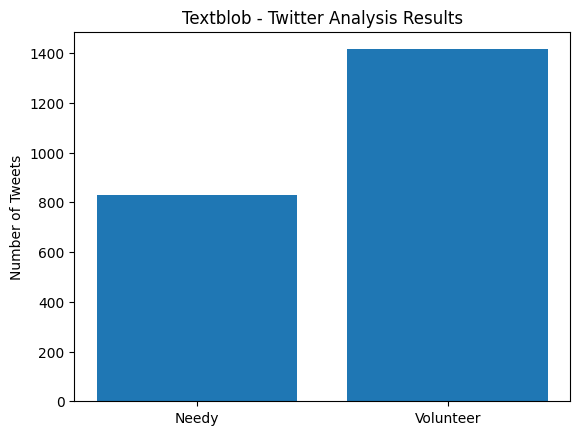

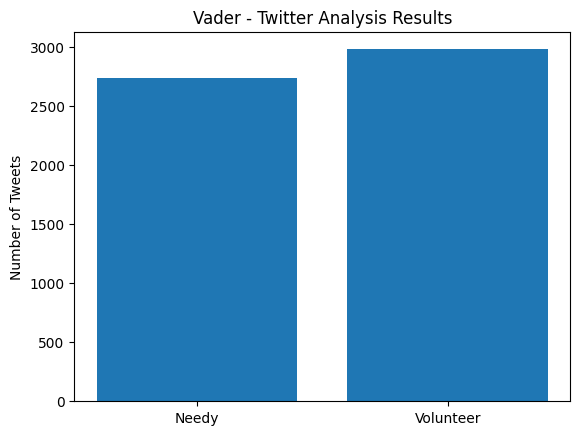

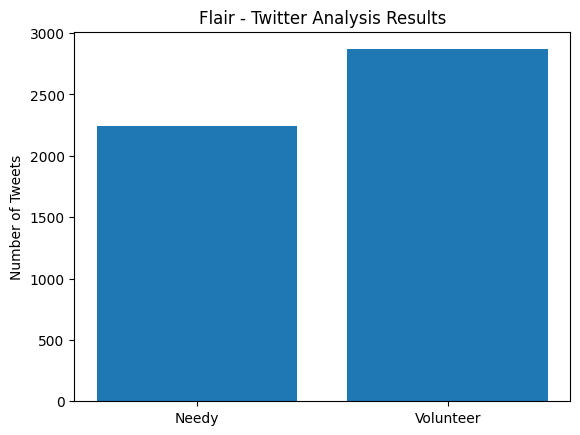

In [ ]:
import matplotlib.pyplot as plt

# Plot Textblob sentiment analysis results
fig, ax = plt.subplots()
ax.bar(['Needy', 'Volunteer'], [len(positive_tweets_needy_textblob), len(positive_tweets_donor_textblob)])
ax.set_ylabel('Number of Tweets')
ax.set_title('Textblob - Twitter Analysis Results')
plt.show()

# Plot Vader sentiment analysis results
fig, ax = plt.subplots()
ax.bar(['Needy', 'Volunteer'], [len(positive_tweets_needy_vader), len(positive_tweets_donor_vader)])
ax.set_ylabel('Number of Tweets')
ax.set_title('Vader - Twitter Analysis Results')
plt.show()

# Plot Flair sentiment analysis results
fig, ax = plt.subplots()
ax.bar(['Needy', 'Volunteer'], [len(positive_tweets_needy_flair), len(positive_tweets_donor_flair)])
ax.set_ylabel('Number of Tweets')
ax.set_title('Flair - Twitter Analysis Results')
plt.show()



The below code is generating pie charts to show the sentiment distribution for each sentiment analysis tool for tweets related to the "needy" category.

Text Blob - Needy Pie Chart Sentiment:
The total number of tweets for "needy" category is calculated. The positive and negative tweets are counted and their percentage is calculated. A pie chart is created using the percentage values, with green and red colors representing positive and negative sentiments respectively.

Vader - Needy Pie Chart Sentiment:
The total number of tweets for "needy" category is calculated. The positive and negative tweets are counted and their percentage is calculated. A pie chart is created using the percentage values, with green and red colors representing positive and negative sentiments respectively.

Flair - Needy Pie Chart Sentiment:
The total number of tweets for "needy" category is calculated. The positive and negative tweets are counted and their percentage is calculated. A pie chart is created using the percentage values, with green and red colors representing positive and negative sentiments respectively.

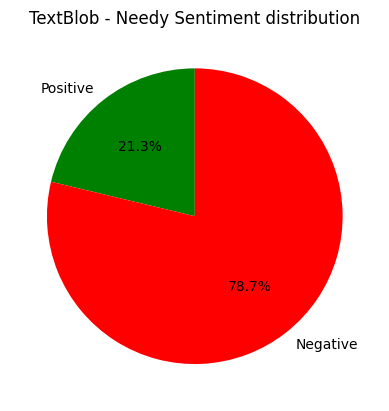

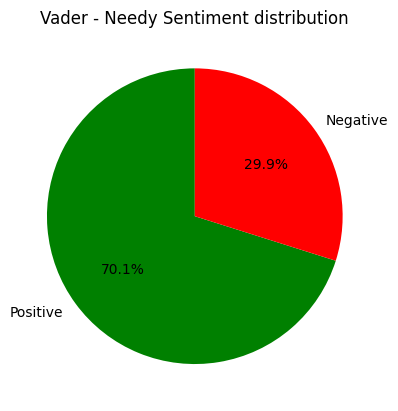

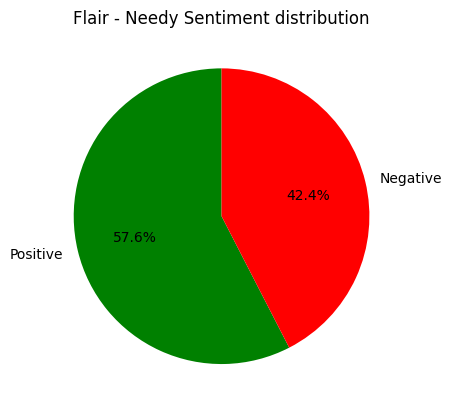

In [ ]:
# Text Blob - Needy Pie Chart Sentiment
totalNeedy_Textblob = len(positive_tweets_needy_textblob) + len(negative_tweets_needy_textblob)
labels = ['Positive', 'Negative']
sizes = [format(100 * len(positive_tweets_needy_textblob) / totalNeedy_Textblob), format(100 * len(negative_tweets_needy_textblob) / totalNeedy_Textblob)]
colors = ['green', 'red']
# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
# Add a title
plt.title('TextBlob - Needy Sentiment distribution')
# Show the chart
plt.show()

print()

# Vader - Needy Pie Chart Sentiment
totalNeedy_Vader = len(positive_tweets_needy_vader) + len(negative_tweets_needy_vader)
labels = ['Positive', 'Negative']
sizes = [format(100 * len(positive_tweets_needy_vader) / totalNeedy_Vader), format(100 * len(negative_tweets_needy_vader) / totalNeedy_Vader)]
colors = ['green', 'red']
# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
# Add a title
plt.title('Vader - Needy Sentiment distribution')
# Show the chart
plt.show()

print()

# Flair - Needy Pie Chart Sentiment
totalNeedy_Flair = len(positive_tweets_needy_flair) + len(negative_tweets_needy_flair)
labels = ['Positive', 'Negative']
sizes = [format(100 * len(positive_tweets_needy_flair) / totalNeedy_Flair), format(100 * len(negative_tweets_needy_flair) / totalNeedy_Flair)]
colors = ['green', 'red']
# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
# Add a title
plt.title('Flair - Needy Sentiment distribution')
# Show the chart
plt.show()

The below code is generating pie charts to show the sentiment distribution for each sentiment analysis tool for tweets related to the "donor" category.

Text Blob - Donor Pie Chart Sentiment:
The total number of tweets for "donor" category is calculated. The positive and negative tweets are counted and their percentage is calculated. A pie chart is created using the percentage values, with green and red colors representing positive and negative sentiments respectively.

Vader - Donor Pie Chart Sentiment:
The total number of tweets for "donor" category is calculated. The positive and negative tweets are counted and their percentage is calculated. A pie chart is created using the percentage values, with green and red colors representing positive and negative sentiments respectively.

Flair - Donor Pie Chart Sentiment:
The total number of tweets for "donor" category is calculated. The positive and negative tweets are counted and their percentage is calculated. A pie chart is created using the percentage values, with green and red colors representing positive and negative sentiments respectively.

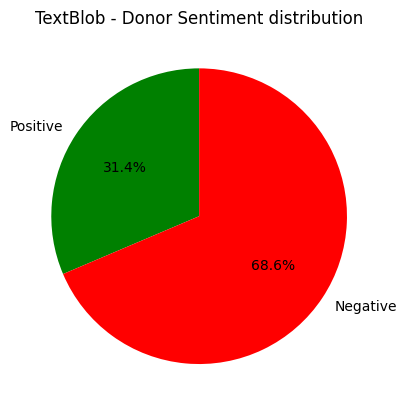

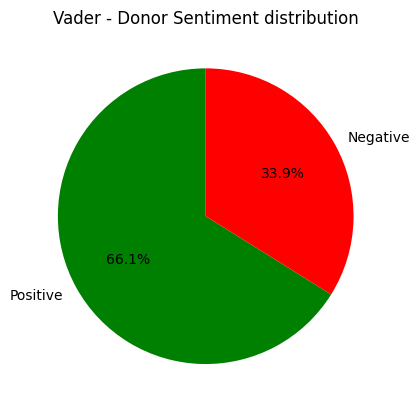

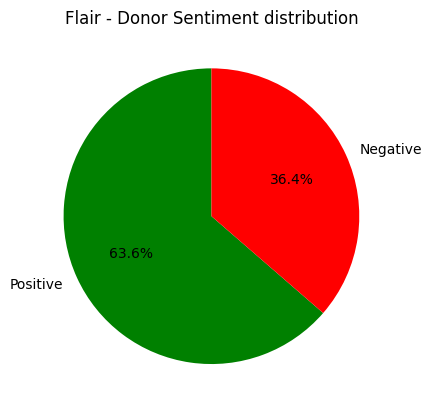

In [ ]:
# Text Blob - Donor Pie Chart Sentiment
totalDonor_Textblob = len(positive_tweets_donor_textblob) + len(negative_tweets_donor_textblob)
labels = ['Positive', 'Negative']
sizes = [format(100 * len(positive_tweets_donor_textblob) / totalDonor_Textblob), format(100 * len(negative_tweets_donor_textblob) / totalDonor_Textblob)]
colors = ['green', 'red']
# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
# Add a title
plt.title('TextBlob - Donor Sentiment distribution')
# Show the chart
plt.show()

print()

# Vader - Donor Pie Chart Sentiment
totalDonor_Vader = len(positive_tweets_donor_vader) + len(negative_tweets_donor_vader)
labels = ['Positive', 'Negative']
sizes = [format(100 * len(positive_tweets_donor_vader) / totalDonor_Vader), format(100 * len(negative_tweets_donor_vader) / totalDonor_Vader)]
colors = ['green', 'red']
# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
# Add a title
plt.title('Vader - Donor Sentiment distribution')
# Show the chart
plt.show()

print()

# Flair - Donor Pie Chart Sentiment
totalDonor_Flair = len(positive_tweets_donor_flair) + len(negative_tweets_donor_flair)
labels = ['Positive', 'Negative']
sizes = [format(100 * len(positive_tweets_donor_flair) / totalDonor_Flair), format(100 * len(negative_tweets_donor_flair) / totalDonor_Flair)]
colors = ['green', 'red']
# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
# Add a title
plt.title('Flair - Donor Sentiment distribution')
# Show the chart
plt.show()

The below code creates a choropleth map using Plotly to visualize the distribution of positive tweets related to needy in each state of the USA.

The list states contains the names of all 50 US states. The list statesShortForm contains the two-letter short forms of all 50 US states. A defaultdict object called stateNeedyCount is created to store the number of positive tweets related to needy in each state. A loop is executed over each positive tweet related to needy and its location is extracted from the needyTweets dictionary. If the location contains the full name or the short form of any US state, the count of positive tweets in that state is incremented in the stateNeedyCount dictionary. Two empty lists states and countsvalue are created to store the state names and their corresponding positive tweet counts. The data dictionary is created to store the information required to create a choropleth map. It includes the type, locations, locationmode, z, colorscale, and colorbar. The layout dictionary is created to store the information related to the overall layout of the choropleth map. It includes the title and geo information. A Plotly figure object x is created using the data and layout dictionaries. Finally, the choropleth map is plotted using Plotly's iplot() function.

In [ ]:
# List of all US States
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

# List of all US state codes
statesShortForm = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

# For Needy - Flair
# Create a defaultdict to store the count of needy tweets for each state
stateNeedyCount = defaultdict(int)

# Iterate over each needy tweet in positive_tweets_needy_vader
for tweetId, tweet in positive_tweets_needy_vader.items():

  # Get the location information from the tweet's data in needyTweets dictionary
  loc = needyTweets[tweetId]['location']

  # Check if the location string contains the name or state code for any US state
  for i in range(50):
    if states[i] in loc or statesShortForm[i] in loc:
      # If the tweet belongs to a US state, increment the count for that state
      stateNeedyCount[statesShortForm[i]] += 1
      break

# Create two empty lists to store the state codes and their respective counts
states, countsvalue = [], []

# Iterate over the stateNeedyCount defaultdict and store the keys (state codes) and values (count of needy tweets) in the above lists
for key, value in stateNeedyCount.items():
  states.append(key)
  countsvalue.append(value)

# Define the choropleth plot's data and layout parameters
data = dict(type = 'choropleth', 
                locations = states, 
                locationmode = 'USA-states', 
                z = countsvalue, 
                colorscale = 'Greens', 
                colorbar = {'title' : 'colorbar'})
layout = dict(title = 'Needy in USA', 
                geo = dict(scope='usa' , 
                showlakes = True, 
                lakecolor = 'rgb(0,191,255)'))

# Create a new figure object using the plotly.graph_objs module
x = pg.Figure(data = [data], layout = layout)

# Use the plotly.offline.iplot() method to plot the choropleth figure
po.iplot(x)

The below code creates a choropleth map using Plotly to visualize the distribution of positive tweets related to donors in each state of the USA.

The list states contains the names of all 50 US states. The list statesShortForm contains the two-letter short forms of all 50 US states. A defaultdict object called stateDonorCount is created to store the number of positive tweets related to donor in each state. A loop is executed over each positive tweet related to donor and its location is extracted from the donorTweets dictionary. If the location contains the full name or the short form of any US state, the count of positive tweets in that state is incremented in the stateDonorCount dictionary. Two empty lists states and countsvalue are created to store the state names and their corresponding positive tweet counts. The data dictionary is created to store the information required to create a choropleth map. It includes the type, locations, locationmode, z, colorscale, and colorbar. The layout dictionary is created to store the information related to the overall layout of the choropleth map. It includes the title and geo information. A Plotly figure object x is created using the data and layout dictionaries. Finally, the choropleth map is plotted using Plotly's iplot() function.

In [ ]:
# List of all US States
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

# List of all US state codes
statesShortForm = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

# For Donor - Flair
stateDonorCount = defaultdict(int)

# Iterate over each donor tweet in positive_tweets_donor_vader
for tweetId, tweet in positive_tweets_donor_vader.items():

  # Get the location information from the tweet's data in needyTweets dictionary
  loc = donorTweets[tweetId]['location']

  # Check if the location string contains the name or state code for any US state
  for i in range(50):
    if states[i] in loc or statesShortForm[i] in loc:
      # If the tweet belongs to a US state, increment the count for that state
      stateDonorCount[statesShortForm[i]] += 1
      break

# Create two empty lists to store the state codes and their respective counts
states, countsvalue = [], []

# Iterate over the stateDonorCount defaultdict and store the keys (state codes) and values (count of donor tweets) in the above lists
for key, value in stateDonorCount.items():
  states.append(key)
  countsvalue.append(value)

# Define the choropleth plot's data and layout parameters
data = dict(type = 'choropleth', 
                locations = states, 
                locationmode = 'USA-states', 
                z = countsvalue, 
                colorscale = 'Greens', 
                colorbar = {'title' : 'colorbar'})
layout = dict(title = 'Volunteers in USA', 
                geo = dict(scope='usa' , 
                showlakes = True, 
                lakecolor = 'rgb(0,191,255)'))

# Create a new figure object using the plotly.graph_objs module
x = pg.Figure(data = [data], layout = layout)

# Use the plotly.offline.iplot() method to plot the choropleth figure
po.iplot(x)

# **Results**

The above code extracts the full text of positive tweets from the positive_tweets_needy_flair dictionary, which contains the tweet IDs and their respective text data. It stores this information in a list called needyTweetList, with each element being a dictionary that contains the full text of the tweet under the key 'Needy Tweets'.

The needyTweets dictionary is used to extract the full text of each tweet, using the tweet ID from the positive_tweets_needy_flair dictionary as the key.

A pandas DataFrame is then created from the needyTweetList using the pd.DataFrame() function, and the resulting DataFrame is saved as a CSV file called "Needy Tweet Info.csv" using the to_csv() method. The index parameter is set to False to prevent the DataFrame's index from being included in the CSV file.

Finally, the CSV file is downloaded using the files.download() function. This last step is specific to Google Colab, and allows the user to download the CSV file from the notebook environment.

In [ ]:
# Create an empty list to store information about needy tweets.
needyTweetList = []

# Iterate over each needy tweet 
for tweetId, tweet in positive_tweets_needy_flair.items():
  # Extract the full text of the tweet using its tweet ID from the needyTweets dictionary and append it as a key-value pair to the needyTweetList list.
  needyTweetList.append({
      'Needy Tweets': needyTweets[tweetId]['full_text']
  })

# Create a pandas DataFrame from the extracted information
df = pd.DataFrame(needyTweetList)

# Save the DataFrame to a CSV file
df.to_csv("Needy Tweet Info.csv", index=False)

# Download the CSV file from the colab notebook.
files.download('Needy Tweet Info.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The above code extracts the full text of positive tweets from the positive_tweets_donor_flair dictionary, which contains the tweet IDs and their respective text data. It stores this information in a list called donorTweetList, with each element being a dictionary that contains the full text of the tweet under the key 'Donor Tweets'.

The donorTweets dictionary is used to extract the full text of each tweet, using the tweet ID from the positive_tweets_donor_flair dictionary as the key.

A pandas DataFrame is then created from the donorTweetList using the pd.DataFrame() function, and the resulting DataFrame is saved as a CSV file called "Volunteer Tweet Info.csv" using the to_csv() method. The index parameter is set to False to prevent the DataFrame's index from being included in the CSV file.

Finally, the CSV file is downloaded using the files.download() function. This last step is specific to Google Colab, and allows the user to download the CSV file from the notebook environment.

In [ ]:
# Create an empty list to store information about donor tweets.
donarTweetList = []

# Iterate over each donor tweet 
for tweetId, tweet in positive_tweets_donor_flair.items():
  # Extract the full text of the tweet using its tweet ID from the donorTweets dictionary and append it as a key-value pair to the donarTweetList list.
  donarTweetList.append({
      'Donor Tweets': donorTweets[tweetId]['full_text']
  })

# Create a pandas DataFrame from the extracted information
df = pd.DataFrame(donarTweetList)

# Save the DataFrame to a CSV file
df.to_csv("Volunteer Tweet Info.csv", index=False)

# Download the CSV file from the colab notebook.
files.download('Volunteer Tweet Info.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>